# 2108564 Geospatial Data Science and Analysis
## Lecture 3.2 : Spatial Data Visualization using Foluim and **GeoPandas**
> ## Noted By : 6730084521 Chatrphol Ovanonchai

# Geopandas

คราวที่แล้วได้กล่าวถึง Pandas ซึ่งเป็น library ที่ใช้ในการจัดการข้อมูลที่เป็นที่นิยมไปแล้ว คราวนี้จะกล่าวถึง Geopandas ซึ่งเป็น library สำหรับจัดการข้อมูล geospatial ที่มีประสิทธิภาพสูง โดยสามารถโหลด shp file มาใช้งานใน python ได้ด้วย library นี้

Geopandas สามารถใช้ฟังก์ชันต่างๆได้เหมือน pandas และจะเพิ่มความสามารถในการจัดการข้อมูล geospatial ที่มาจาก shapely เข้าไปด้วย

ใน Geopandas จะใช้ matplotlib เป็นมาตรฐานในการแสดงผลข้อมูล ซึ่งอาจมีข้อจำกัดในด้าน interactive กล่าวคือ ไม่สามารถเลื่อนหรือ zoom in และ zoom out แผนที่ได้ ดังนั้นใช้ library Folium หรือ library อื่นดีกว่า

อ่านรายละเอียดเพิ่มเติมได้ที่:

https://leafletjs.com/


https://github.com/robmarkcole/python-cheat-sheets/blob/master/geopandas-shapely-geopy.ipynb



## Install geopandas

* ถ้า install ใน anaconda ก็แค่ conda install geopandas ใน environment ของตัวเอง packages อื่น ๆ ที่จำเป็นก็จะ install ให้เอง
* ถ้าใช้ google colab ก็ต้องทำตามด้านล่างนี้

In [3]:
# Important library for many geopython libraries
!apt install all gdal-bin python-gdal python3-gdal
# Install rtree - Geopandas requirement
!apt install python3-rtree
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirement
!pip install descartes
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
# Install shape file manager
!pip install fiona
# Install Geopandas
! pip install geopandas
# Install GeoDatasets
! pip install geodatasets

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Unable to locate package all
E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3

In [4]:
#Install mapclassify
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 14.4 MB/s eta 0:00:00


## Shapely

geopandas จะมีโครงสร้างเป็นตารางเหมือน pandas แต่จะมีคอลัมน์พิเศษเพิ่มขึ้นมาสำหรับเก็บ geometry ตามรูปด้านล่าง

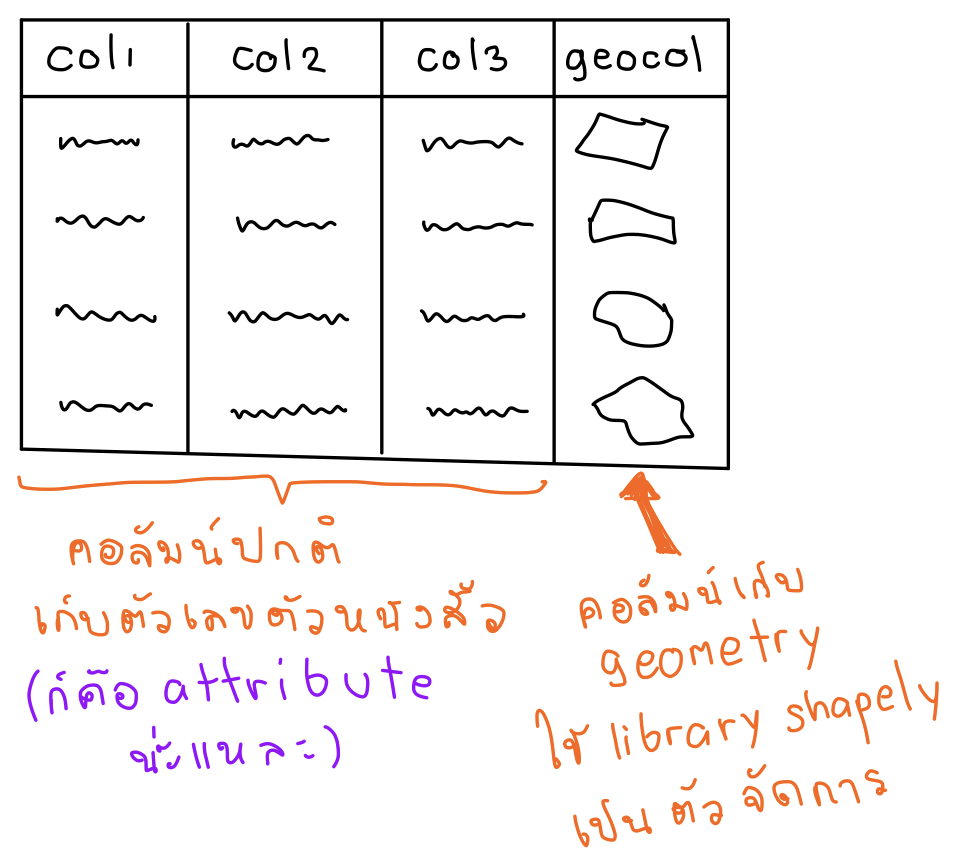

การทำ spatial operation ทั้งหมดจะใช้ shapely เป็นตัวจัดการ ดังนั้น จะทำการแสดงวิธีการสร้าง geometry ด้วยมือ ด้วยรูปแบบต่าง ๆ ก่อน เพื่อให้ทราบถึงโครงสร้างพื้นฐานของ geometry จากนั้นจึงจะสาธิตวิธีการโหลดข้อมูลจาก csv และ shp file เข้ามาใน geopandas


การสร้าง geometry สามารถทำได้ 3 วิธีคือ

1.   การสร้างตามมาตรฐานของ shapely
2.   การสร้างด้วย well-kwnown text
3.   การสร้างด้วย geojson



ใน shapely เป็น cartesian coordinate ปกติ

In [5]:
import shapely.geometry as shp
from shapely.geometry import Point, LineString, Polygon # สามารถเรียกใช้ object ได้เลย ไม่ต้องเรียกจาก shapely แล้ว

1. การสร้างตามมาตรฐานของ shapely

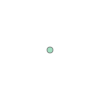

In [6]:
pt = Point(100.819100, 19.431400)
pt

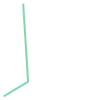

In [7]:
line = LineString([(1,9) , (6,12) , (5,28)])
line

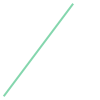

In [8]:
# หรือจะสร้าง Point ก่อน เเเล้วค่อยมายัดลง Line ก็ได้
point1 = Point(1,5)
point2 = Point(4,9)

line_connect = LineString([point1 , point2])
line_connect

In [9]:
pyg = Polygon([(0, 0), (0, 1), (1, 1), (0,0)])

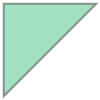

In [10]:
pyg

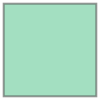

In [11]:
pt1 = Point(0,0)
pt2 = Point(5,0)
pt3 = Point(5,5)
pt4 = Point(0,5)

pointList = (pt1,pt2,pt3,pt4,pt1)

Polygon([[p.x, p.y] for p in pointList])

2. สร้าง geometry จาก Well-Known Text (WKT) (สังเกตว่ารูปแบบ WKT จะไม่มี comma คั่น lat กับ lon)

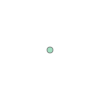

In [12]:
from shapely.wkt import dumps, loads

pt2 = Point(loads('POINT (100.813100 19.421400)')) # key เป็น Well-Known Text ได้ เเล้ว Loads text เอา
pt2

3. สร้าง geometry จาก geojson

In [13]:
import json
from shapely.geometry import mapping, shape

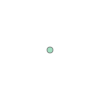

In [14]:
# ดึงมาเเค่ส่วน Geometry (มี Coordinate , Type ข้างใน) จาก GeoJSON
pt3 = shape(json.loads('{"type": "Point", "coordinates": [100.819100, 18.433400, 0.0]}'))
pt3 # เอาไป plot ลง Map ได้โดยใช้ Folium

In [15]:
# ลอง plot จุดที่อยู่บน
pt_Bangkok = shape(json.loads('{"type": "Point", "coordinates": [100.4998144905702, 13.733284602589194]}')) # ให้อยู่บน line เดียวกัน

export geometry เป็น json

In [16]:
json.dumps(mapping(pt))

'{"type": "Point", "coordinates": [100.8191, 19.4314]}'

กรณีด้านล่าง เป็นการวาดสี่เหลี่ยมที่เว็บ https://geojson.io ที่ใช้สำหรับวาด geojson อย่างง่าย โดย copy geojson มาสร้าง polygon ได้เลย

แต่เราต้องลบส่วนอื่นออก (ส่วนสีเหลือง) เหลือแต่ตัว geometry จริงๆ

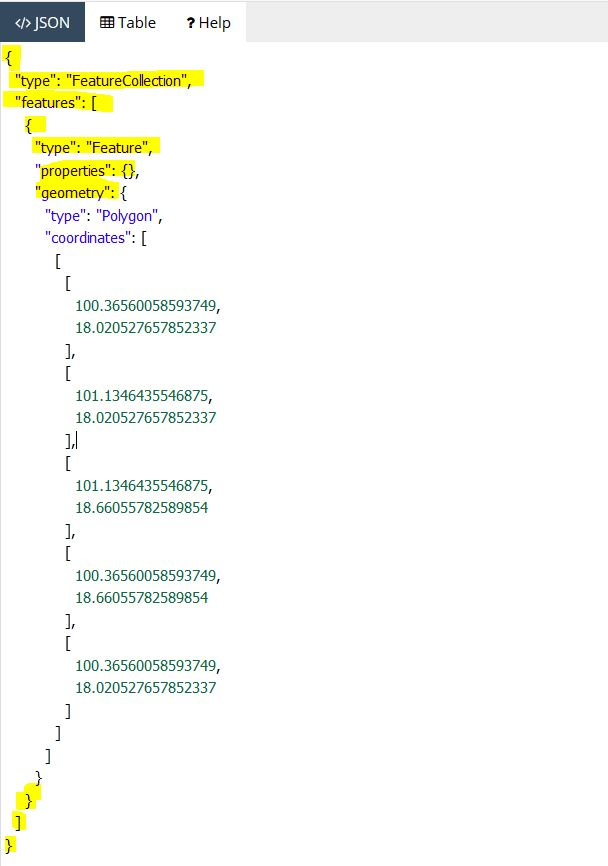

In [17]:
mypolyjson = {
        "type": "Polygon",
        "coordinates": [
          [
            [
              100.36560058593749,
              18.020527657852337
            ],
            [
              101.1346435546875,
              18.020527657852337
            ],
            [
              101.1346435546875,
              18.66055782589854
            ],
            [
              100.36560058593749,
              18.66055782589854
            ],
            [
              100.36560058593749,
              18.020527657852337
            ]
          ]
        ]
      }

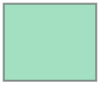

In [18]:
poly = shape(json.loads(json.dumps(mypolyjson)))
poly

การ plotจุดที่สร้าง จะต้องจุดทั้งหมดมารวมใน matrix เดียวกัน จากนั้นนำค่า x กับ y มา แล้วนำมา plot

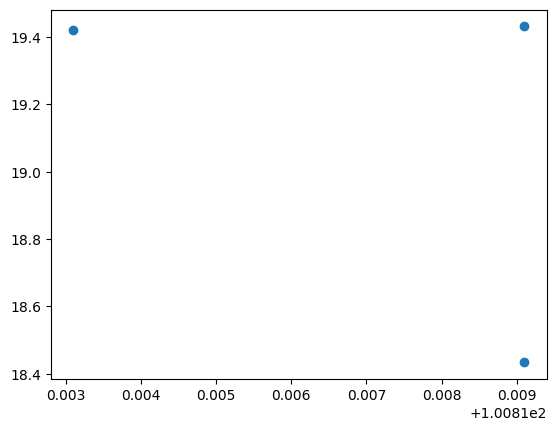

In [19]:
import matplotlib.pyplot as plt
pts = [pt,pt2,pt3]
xs = [point.x for point in pts]
ys = [point.y for point in pts]
plt.scatter(xs, ys)

## เริ่มใช้งาน geopandas

## โครงสร้างของ geopandas

Geopandas จะมีโครงสร้างข้อมูลเหมือน pandas กล่าวคือ มี GeoSeries และ GeoDataFrame

- GeoSeries ก็คือคอลัมน์แต่ละคอลัมน์
- GeoDataFrame ก็คือทั้งตาราง

ฟังก์ชันของ GeoSeries และ GeoDataFrame ไม่เหมือนกัน

import library ที่จำเป็น

In [20]:
import pandas as pd
import geopandas as gp

## import ข้อมูล csv

ในการ import ข้อมูล csv หรือข้อมูลตัวหนังสือใด ๆ(ข้อมูลจุด) จะทำ 2 ขั้นตอน
1. ใช้ pandas อ่านข้อมูล csv เข้ามาก่อน
2. สร้าง geopandas จาก pandas

In [21]:
import pandas as pd
import json
import geopandas as gp

df = pd.read_csv('https://raw.githubusercontent.com/Maplub/MonthlyAirQuality/master/sensorlist.csv')

In [22]:
df.head(4)

sensorid                          name province     amphoe      tambol  \
0  CU-S0012     องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง        เปือ   
1  CU-S0006  องค์การบริหารส่วนตำบลพระธาตุ     น่าน  เชียงกลาง     พระธาตุ   
2  CU-S0014          เทศบาลตำบลพระพุทธบาท     น่าน  เชียงกลาง  พระพุทธบาท   
3  CU-S0047   องค์การบริหารส่วนตำบลจอมพระ     น่าน   ท่าวังผา      จอมพระ   

        lat       lon  
0  19.33190  100.8192  
1  19.33620  100.8951  
2  19.27280  100.8397  
3  19.08279  100.8509

จากนั้นแปลงคอลัมน์ lat lon ให้เป็น geometry ด้วย geopandas

**ทำไมเราต้องแปลง?**

ถ้าเป็น text ธรรมดาเราจะไม่สามารถใช้ฟังก์ชันวิเคราะห์เชิงพื้นที่ได้ อย่างเช่น ไม่สามารถหา overlap, touch ได้ เป็นต้น

กำหนด coordinate system ตามระบบ epsg โดย search ดูรหัสได้ที่ https://epsg.io/

ในที่นี้ใช้ระบบ WGS84 คือรหัส 4326

In [23]:
crs = "EPSG:4326"
# crs คือ มาตรฐานการใช้วัด latitude , longtitude ชื่อ WGS 84 (วัดโลกเสมือนทรงรีบนโลก)

สร้าง column ชื่อ `geometry` และ GeoDataFrame ชื่อ `geo_df`

In [24]:
# create column `geometry`
geometry = gp.points_from_xy(df.lon , df.lat) # ดึงทั้ง column ของ DataFrame มาสร้างได้เลย

# create GeoDataFrame ขึเนมา
geo_df  = gp.GeoDataFrame(df , crs=crs , geometry = geometry) # crs = มาตรฐานการวัด Latitude - Longitude

In [25]:
geo_df.head()

sensorid                          name province     amphoe      tambol  \
0  CU-S0012     องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง        เปือ   
1  CU-S0006  องค์การบริหารส่วนตำบลพระธาตุ     น่าน  เชียงกลาง     พระธาตุ   
2  CU-S0014          เทศบาลตำบลพระพุทธบาท     น่าน  เชียงกลาง  พระพุทธบาท   
3  CU-S0047   องค์การบริหารส่วนตำบลจอมพระ     น่าน   ท่าวังผา      จอมพระ   
4  CU-S0061   องค์การบริหารส่วนตำบลตาลชุม     น่าน   ท่าวังผา      ตาลชุม   

        lat       lon                   geometry  
0  19.33190  100.8192   POINT (100.8192 19.3319)  
1  19.33620  100.8951   POINT (100.8951 19.3362)  
2  19.27280  100.8397   POINT (100.8397 19.2728)  
3  19.08279  100.8509  POINT (100.8509 19.08279)  
4  19.03684  100.7986  POINT (100.7986 19.03684)

แถวที่เป็น geometry จะแสดงด้วย Well Known Text (WKT) ซึ่งเป็นวิธีการแสดง geometry ด้วยตัวหนังสือ ซึ่งจะเหมือนกับที่ใช้ใน database ทีรองรับข้อมูล spatial เช่น PostGIS เป็นต้น

ชนิด geometry | WKT | อธิบาย
--- | --- | ---
Point | 'POINT (10 10)'
Line string | 'LINESTRING(10 10, 15 15,30 30)' | เส้นที่ประกอบไปด้วย 3 จุด
Polygon | 'POLYGON ((10 10, 10 20, 20 20, 20 15, 10 10))' | polygon มีวงแต่วงนอก ไม่มีรูตรงกลาง
MultiPoint | 'MULTIPOINT(10 10, 20 20)' | multipoint ที่มีสมาชิกเป็นจุด 2 จุด
MultiLineString | 'MULTIPOINT ((10 10, 20 20),(15 15, 30 15))'
MultiPolygon | 'MULTIPOLYGON(((10 10, 10 20, 20 20, 20 15, 10 10)),((60 60, 70 70, 80 60, 60 60)))' | multipolygon ที่มี 2 polygon
GeomCollection | 'GEOMETRYCOLLECTION' (POINT(10 10), POINT(15 20), LINESTRING(15 15, 20 20))' | มีสมาชิกเป็นได้หลายชนิด

เลือกข้อมูลได้เหมือนกับ pandas ธรรมดา

In [26]:
geo_df[geo_df['tambol']=='ปัว'] # เลือก Tambol ชื่อ ปัว

sensorid           name province amphoe tambol       lat       lon  \
39  CU-S0099  เทศบาลตำบลปัว     น่าน    ปัว    ปัว  19.17975  100.9092   

                     geometry  
39  POINT (100.9092 19.17975)

ลอง `import shp file` (ต้อง import library ชื่อ fiona เข้ามาก่อน)

In [27]:
import fiona
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In [28]:
# Zip File (Zip มาจากใน GitHub มาแล้ว) เพื่อ read file
zipfile = 'https://github.com/Maplub/AirQualityData/raw/master/nan_shp_wgs84.zip'
nan_boundary = gp.read_file(zipfile)

## ความเจ๋ง คือ shape file ที่เรา zip เข้ามา เมื่อเราอ่านหมดเเล้ว สามารถสร้างให้เราเป็น GeoDataFrame ได้เลย
nan_boundary # เรียกดู GeoDataFrame ได้

AREA  PERIMETER  POLBNDRY_  POLBNDRY_I TAMBON_IDN TAM_CODE  \
0   748200.0  109289.20        140         139     551502       02   
1   508120.0   42947.16        515         514     550716       16   
2   723400.0   56936.95        389         388     550301       01   
3   806670.0   24319.04        262         261     550514       14   
4   509840.0   40746.70        417         416     550116       16   
..       ...        ...        ...         ...        ...      ...   
94   83079.0   12716.23        396         395     550101       01   
95  575200.0  115063.70        521         520     550711       11   
96  835940.0   27192.59        394         393     550104       04   
97  556050.0   19343.03        393         392     550105       05   
98  868500.0   93907.05        267         266     550602       02   

      TAM_NAM_T AMPHOE_IDN AMP_CODE           AMPHOE_T  \
0     ต.ขุนน่าน       5515       15  อ.เฉลิมพระเกียรติ   
1       ต.แม่สา       5507       07          อ.เวียงสา   
2     ต.บ้านฟ้า       5503       03         อ.บ้านหลวง   
3       ต.วรนคร       5505       05              อ.ปัว   
4         ต.สวก       5501       01        อ.เมืองน่าน   
..          ...        ...      ...                ...   
94    ต.ในเวียง       5501       01        อ.เมืองน่าน   
95  ต.อ่ายนาไลย       5507       07          อ.เวียงสา   
96    ต.ไชยสถาน       5501       01        อ.เมืองน่าน   
97     ต.ถืมตอง       5501       01        อ.เมืองน่าน   
98      ต.ป่าคา       5506       06         อ.ท่าวังผา   

                   AMPHOE_E PROV_CODE PROV_NAM_T    PROV_NAM_E P_CODE  \
0   Amphoe Charoem Phrakiat        55     จ.น่าน  Changwat Nan     NN   
1           Amphoe Wiang Sa        55     จ.น่าน  Changwat Nan     NN   
2          Amphoe Ban Luang        55     จ.น่าน  Changwat Nan     NN   
3                Amphoe Pua        55     จ.น่าน  Changwat Nan     NN   
4          Amphoe Muang Nan        55     จ.น่าน  Changwat Nan     NN   
..                      ...       ...        ...           ...    ...   
94         Amphoe Muang Nan        55     จ.น่าน  Changwat Nan     NN   
95          Amphoe Wiang Sa        55     จ.น่าน  Changwat Nan     NN   
96         Amphoe Muang Nan        55     จ.น่าน  Changwat Nan     NN   
97         Amphoe Muang Nan        55     จ.น่าน  Changwat Nan     NN   
98       Amphoe Tha Wangpha        55     จ.น่าน  Changwat Nan     NN   

                                             geometry  
0   POLYGON ((101.14344 19.578, 101.14396 19.57791...  
1   POLYGON ((100.68587 18.5821, 100.68555 18.5819...  
2   POLYGON ((100.49666 18.8198, 100.49681 18.8197...  
3   POLYGON ((100.93347 19.19254, 100.9335 19.1925...  
4   POLYGON ((100.60792 18.77742, 100.60825 18.777...  
..                                                ...  
94  POLYGON ((100.76441 18.77665, 100.76453 18.776...  
95  POLYGON ((100.59024 18.57221, 100.59066 18.572...  
96  POLYGON ((100.72722 18.81276, 100.72796 18.812...  
97  POLYGON ((100.72302 18.81396, 100.72315 18.813...  
98  POLYGON ((100.61793 19.18368, 100.61881 19.183...  

[99 rows x 16 columns]

Note : ตอนนี้เรามี GeoDataFrame 2 อัน คือ
- `geo_df` แสดงจุด Polygon ย่อยๆ ที่เรา Plot ที่ Sensor วัดมา (สีเเดง)
- `nan_boundary` แสดงจุด Polygon ย่อยๆ ของจังหวัดน่าน (สีน้ำเงิน)

ตอนนี้เราต้องรวม Boundary ของจังหวัดน่านให้ได้ก่อน

plot ข้อมูล station และ รูปจังหวัด

In [29]:
# import library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<Axes: >

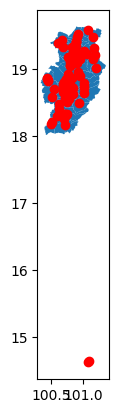

In [30]:
# plot 2 Polygon ลงบนรูปเดียวกัน

fig, ax1 = plt.subplots() # graph matplotlib
nan_boundary.plot(ax = ax1) # plot nan_boundary ลงบนรูปเดิม
geo_df.plot(ax = ax1 , color = 'Red')

## ตอนนี้ทั้ง 2 GeoDataFrame ยังเป็น ploygon ย่อยๆ -> เราจะรวม Boundary ของ nan_boundary ให้เป็นพื้นที่ (type จะกลายเป็น shapely)
# คือทั้งคู่เป็น GeoDataFrame เเต่ถ้าเอามา plot จะได้เป็นจุด Polygon

In [31]:
geo_df # เป็น GeoDataFrame

sensorid                             name province     amphoe  \
0    CU-S0012        องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง   
1    CU-S0006     องค์การบริหารส่วนตำบลพระธาตุ     น่าน  เชียงกลาง   
2    CU-S0014             เทศบาลตำบลพระพุทธบาท     น่าน  เชียงกลาง   
3    CU-S0047      องค์การบริหารส่วนตำบลจอมพระ     น่าน   ท่าวังผา   
4    CU-S0061      องค์การบริหารส่วนตำบลตาลชุม     น่าน   ท่าวังผา   
..        ...                              ...      ...        ...   
92  CU-S00083        องค์การบริหารส่วนตำบลสกาด     น่าน        ปัว   
93   CU-S0035                เทศบาลตำบลหนองแดง     น่าน    แม่จริม   
94   CU-S0008       องค์การบริหารส่วนตำบลชนแดน     น่าน     สองแคว   
95   CU-S0202                 ชุมชนบ้านเจริญพร  สระบุรี    แก่งคอย   
96   CU-S0201  บ้านพักพนักงานปูนซีเมนต์นครหลวง  สระบุรี    แก่งคอย   

        tambol        lat         lon                    geometry  
0         เปือ  19.331900  100.819200    POINT (100.8192 19.3319)  
1      พระธาตุ  19.336200  100.895100    POINT (100.8951 19.3362)  
2   พระพุทธบาท  19.272800  100.839700    POINT (100.8397 19.2728)  
3       จอมพระ  19.082790  100.850900   POINT (100.8509 19.08279)  
4       ตาลชุม  19.036840  100.798600   POINT (100.7986 19.03684)  
..         ...        ...         ...                         ...  
92        สกาด  19.265020  101.008300   POINT (101.0083 19.26502)  
93     หนองแดง  18.716840  101.008660  POINT (101.00866 18.71684)  
94       ชนแดน  19.433400  100.670800    POINT (100.6708 19.4334)  
95     ทับกวาง  14.636601  101.083370   POINT (101.08337 14.6366)  
96     ทับกวาง  14.615429  101.077419  POINT (101.07742 14.61543)  

[97 rows x 8 columns]

จะสังเกตเห็นได้ว่า มีจุดเเดงๆ โผล่ออกมานอก `nan_boundary`

เราจะเเก้โดยการใช้คำสั่ง `.within` เพื่อเช็คว่าจุดอยู่ในบริเวณในจังหวัดน่านมั้ย?

# คำสั่งไหนเป็นของ GeoSeries อันไหนเป็นของ GeoDataFrame?

คำสั่งของ GeoDataFrame เป็นการจัดการตาราง อย่างเช่น

* การนำเข้าหรือส่งออกไฟล์
* การจัดการ index


คำสั่งของ GeoSeries เป็นฟังก์ชันจัดการ geometries ทั้งหมด เช่น

* การหาพื้นที่ ความยาวรอบรูป
* การหาระยะทางระหว่าง GeoSeries กับ GeoSeries หรือ geometric object อื่น
* การหาค่าพิกัด x, y, z ของข้อมูลแบบจุด
* คำสั่งกลุ่ม Unary Predicates เป็นการที่จะออกมาเป็นค่า True หรือ False
* คำสั่งกลุ่ม Binary Predicates มักจะเป็น การดำเนินการเกี่ยวกับ geometries 2 อันขึ้นไป โดยมี input parameter เป็น GeoSeries หรือ Geometry ตัวอื่น
* คำสั่งอื่น ๆ อีกมาก โดยดูได้จาก https://geopandas.org/reference.html#geoseries

<Axes: >

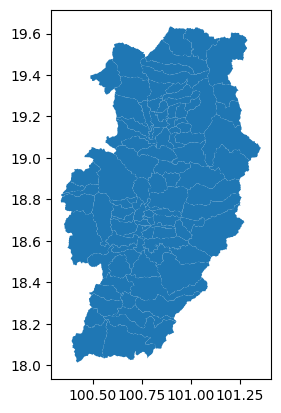

In [32]:
fig, ax1 = plt.subplots()
nan_boundary.plot(ax=ax1)

In [33]:
! pip install geodatasets
import geodatasets
import folium
nan_boundary.explore()

## ลองวิเคราะห์ง่าย ๆ

### unary_union

รวมทุกตำบลให้กลายเป็นผืนเดียว จะได้เป็น polygon รูปเดียว

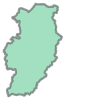

In [34]:
nan_all = nan_boundary.union_all()
nan_all # เรียกดู voundary ที่เขื่อมเเล้ว

In [35]:
# เช็ค typeว่าเป็นประเภทอะไร
type(nan_all) # polygon

shapely.geometry.polygon.Polygon

### within

เลือกเฉพาะจุดที่อยู่ในจ.น่าน

In [36]:
geo_df[geo_df['sensorid']=='CU-S0012'] # เลือก sensor ที่ชื่อ CU-S0012 ใน geo-df

sensorid                       name province     amphoe tambol      lat  \
0  CU-S0012  องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง   เปือ  19.3319   

        lon                  geometry  
0  100.8192  POINT (100.8192 19.3319)

In [37]:
# เช็คเเต่ละจุดใน geo_df (จุดจากการวัดของ Sensor) ว่่าอยู่ใน nan_all มั้ย
geo_df.geometry.within(nan_all) # 2 จุดท้าย (95,96) ไม่อยู่ใสน geo_df

0      True
1      True
2      True
3      True
4      True
      ...  
92     True
93     True
94     True
95    False
96    False
Length: 97, dtype: bool

In [38]:
# ลอง plot ใน map โดยใช้คำสั่ง .explore()
nan_sta = geo_df.loc[geo_df.geometry.within(nan_all)] # เลือก column ที่ within nan_all (อยู่ในนอาณาเขต)
nan_sta # เรียก DataFrame มี 94 แถว

sensorid                           name province     amphoe      tambol  \
0    CU-S0012      องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง        เปือ   
1    CU-S0006   องค์การบริหารส่วนตำบลพระธาตุ     น่าน  เชียงกลาง     พระธาตุ   
2    CU-S0014           เทศบาลตำบลพระพุทธบาท     น่าน  เชียงกลาง  พระพุทธบาท   
3    CU-S0047    องค์การบริหารส่วนตำบลจอมพระ     น่าน   ท่าวังผา      จอมพระ   
4    CU-S0061    องค์การบริหารส่วนตำบลตาลชุม     น่าน   ท่าวังผา      ตาลชุม   
..        ...                            ...      ...        ...         ...   
90  CU-S00103      องค์การบริหารส่วนตำบลภูคา     น่าน        ปัว        ภูคา   
91  CU-S00104  องค์การบริหารส่วนตำบลเชียงของ     น่าน     นาน้อย    เชียงของ   
92  CU-S00083      องค์การบริหารส่วนตำบลสกาด     น่าน        ปัว        สกาด   
93   CU-S0035              เทศบาลตำบลหนองแดง     น่าน    แม่จริม     หนองแดง   
94   CU-S0008     องค์การบริหารส่วนตำบลชนแดน     น่าน     สองแคว       ชนแดน   

         lat        lon                    geometry  
0   19.33190  100.81920    POINT (100.8192 19.3319)  
1   19.33620  100.89510    POINT (100.8951 19.3362)  
2   19.27280  100.83970    POINT (100.8397 19.2728)  
3   19.08279  100.85090   POINT (100.8509 19.08279)  
4   19.03684  100.79860   POINT (100.7986 19.03684)  
..       ...        ...                         ...  
90  19.21986  101.06360   POINT (101.0636 19.21986)  
91  18.30970  100.73520    POINT (100.7352 18.3097)  
92  19.26502  101.00830   POINT (101.0083 19.26502)  
93  18.71684  101.00866  POINT (101.00866 18.71684)  
94  19.43340  100.67080    POINT (100.6708 19.4334)  

[95 rows x 8 columns]

In [39]:
## ลองเอา GeoDataFrame ไป plot ลงใน map โดยใช้ .explore()
nan_sta.explore()

### plot polygon

จะ Plot Polygon ที่สร้างไว้ จะใช้ `.plot()` ตรง ๆ ไม่ได้ เนื่องจากเป็น object ของ shapely ซึ่งไม่มี method นี้ ดังนั้น จึงต้องแปลงเป็น object ของ geopandas ก่อน วิธีง่าย ๆ คือ แปลงเป็น GeoSeries แล้วถึงจะสั่ง plot (GeoSeries ใส่ geometry ได้หลายตัว แต่ในที่นี้ใส่แค่ตัวเดียวก่อน)

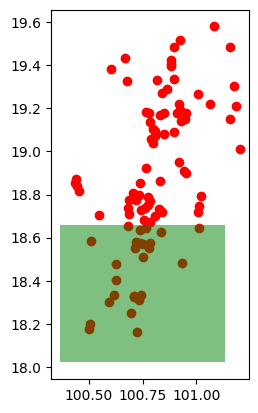

In [52]:
g = gp.GeoSeries([poly]) # poly เป็น square ที่เราเคย plot ไว้
ax = nan_sta.plot(color='red'); # plot จุดจาก nan_sta (จุดในจังหวัดน่านที่อยู่ใน nan_boundary)
g.plot(ax=ax, color='green', alpha=0.5); # alpha = transparency

### Buffer

เนื่องจากจุดอยู่ในระบบพิกัด WGS84 ซึ่งเป็น geographic CRS เราจะต้องแปลงให้เป็น projected CRS ก่อน ถึงจะใช้ Buffer ได้ มิเช่นนั้นจะมีข้อความเตือน และได้ polygon มาแบบผิด ๆ (CRS = Coordinate Reference System)

หลังจากนั้นสร้าง buffer จะได้ buffer ออกไป 5000 เมตรแล้วเก็บบันทึกในคอลัมน์ใหม่

In [58]:
nan_UTM = nan_sta.to_crs("EPSG:32647") # coordinate ystem for thailand (ใข้หน่วยเป็น m)

### Geometry WGS84 เป็น Point (Geographic CRS) -> Buffer EPSG32467 (Projected CRS) เป็น Polygon

# เลือกอถว buffer ออกมา เป็น polygon แล้ว plot ลงระบบปกติ
nan_UTM['buffer']= nan_UTM.buffer(5000) # ขยายระยะ buffer 5000 m ออกไป

<Axes: >

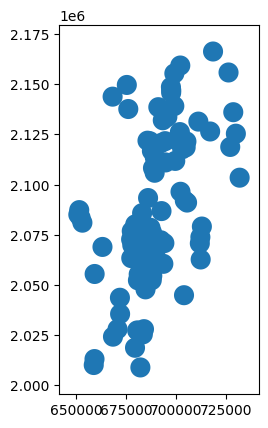

In [56]:
nan_UTM['buffer'].plot()

### Convex hull and Intersection

ในส่วนนี้จะทดลองสร้าง convex hull คลุมจุดทั้งหมด จากนั้นจะทำการทดลอง intersect polygon ของ convex hull ที่สร้างขึ้นกับ buffer ในส่วนที่แล้ว

การทำ convex hull ต้องรวมจุดทั้งหมดให้เป็น GeoSeries ก่อนด้วยคำสั่ง unary_union จากนั้นถึงจะใช้ convex_hull รอบจุดทุกจุดได้ (ไม่งั้นจะเป็น convex hull รอบจุดเดียว)

In [60]:
convex = nan_UTM.unary_union.convex_hull

/tmp/ipython-input-1696001215.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  convex = nan_UTM.unary_union.convex_hull


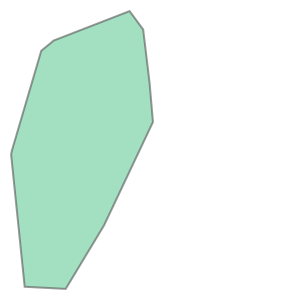

In [61]:
convex

การทำ intersection จะต้องใช้ GeoSeries เช่นกัน

ดังนั้นจึงเอาผลจาก buffer มาแปลงเป็น GeoSeries ก่อน จึงจะใช้ฟังก์ชั้น intersection กับ convex ได้

In [62]:
nan_UTM

sensorid                           name province     amphoe      tambol  \
0    CU-S0012      องค์การบริหารส่วนตำบลเปือ     น่าน  เชียงกลาง        เปือ   
1    CU-S0006   องค์การบริหารส่วนตำบลพระธาตุ     น่าน  เชียงกลาง     พระธาตุ   
2    CU-S0014           เทศบาลตำบลพระพุทธบาท     น่าน  เชียงกลาง  พระพุทธบาท   
3    CU-S0047    องค์การบริหารส่วนตำบลจอมพระ     น่าน   ท่าวังผา      จอมพระ   
4    CU-S0061    องค์การบริหารส่วนตำบลตาลชุม     น่าน   ท่าวังผา      ตาลชุม   
..        ...                            ...      ...        ...         ...   
90  CU-S00103      องค์การบริหารส่วนตำบลภูคา     น่าน        ปัว        ภูคา   
91  CU-S00104  องค์การบริหารส่วนตำบลเชียงของ     น่าน     นาน้อย    เชียงของ   
92  CU-S00083      องค์การบริหารส่วนตำบลสกาด     น่าน        ปัว        สกาด   
93   CU-S0035              เทศบาลตำบลหนองแดง     น่าน    แม่จริม     หนองแดง   
94   CU-S0008     องค์การบริหารส่วนตำบลชนแดน     น่าน     สองแคว       ชนแดน   

         lat        lon                        geometry  \
0   19.33190  100.81920   POINT (691113.03 2138556.734)   
1   19.33620  100.89510  POINT (699083.605 2139118.353)   
2   19.27280  100.83970  POINT (693336.663 2132037.359)   
3   19.08279  100.85090  POINT (694737.291 2111016.623)   
4   19.03684  100.79860  POINT (689285.398 2105873.011)   
..       ...        ...                             ...   
90  19.21986  101.06360   POINT (716943.819 2126441.25)   
91  18.30970  100.73520  POINT (683392.141 2025322.693)   
92  19.26502  101.00830  POINT (711070.516 2131372.599)   
93  18.71684  101.00866  POINT (711800.964 2070688.596)   
94  19.43340  100.67080  POINT (675410.725 2149634.437)   

                                               buffer  
0   POLYGON ((696113.03 2138556.734, 696088.954 21...  
1   POLYGON ((704083.605 2139118.353, 704059.528 2...  
2   POLYGON ((698336.663 2132037.359, 698312.586 2...  
3   POLYGON ((699737.291 2111016.623, 699713.215 2...  
4   POLYGON ((694285.398 2105873.011, 694261.321 2...  
..                                                ...  
90  POLYGON ((721943.819 2126441.25, 721919.743 21...  
91  POLYGON ((688392.141 2025322.693, 688368.065 2...  
92  POLYGON ((716070.516 2131372.599, 716046.44 21...  
93  POLYGON ((716800.964 2070688.596, 716776.888 2...  
94  POLYGON ((680410.725 2149634.437, 680386.649 2...  

[95 rows x 9 columns]

In [63]:
buffer = nan_UTM['buffer'].unary_union

/tmp/ipython-input-3425957791.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  buffer = nan_UTM['buffer'].unary_union


In [64]:
type(buffer)

shapely.geometry.multipolygon.MultiPolygon

In [66]:
holes = convex.intersection(buffer)

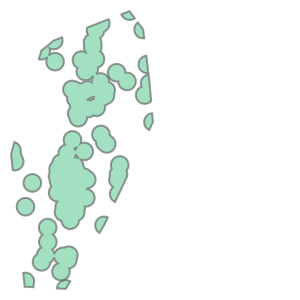

In [67]:
holes

# สรุป

* เราจะใช้ฟังก์ชันอะไรได้ต้องตรวจสอบชนิดของตัวแปรก่อน ทำได้โดยใช้คำสั่ง type() เช่น type(nan_sta)
* ใน geopandas จะมีฟังก์ชันที่สำคัญ 2 กลุ่มคือฟังก์ชันสำหรับ GeoDataframe กับฟังก์ชันสำหรับ GeoSeries
